In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
mydata_old = pd.read_csv("C:\\Users\\oakin\\Documents\\Clincal Volumes\\Clinical Data to Python.csv")

In [3]:
mydata_old.columns = ['Week of Triage_DT', 'AdmitCount','TotalVisits','TriageLevel']
mydata = mydata_old.drop(0)

In [4]:
mydata.head()

,Week of Triage_DT,AdmitCount,TotalVisits,TriageLevel
1,27-Mar-22,2,2,CTAS-1
2,03-Apr-22,13,19,CTAS-1
3,10-Apr-22,20,20,CTAS-1
4,17-Apr-22,18,24,CTAS-1
5,24-Apr-22,21,22,CTAS-1


In [5]:
mydata['TriageLevel'].unique()

array(['CTAS-1', 'CTAS-2', 'CTAS-3', 'CTAS-4', 'CTAS-5'], dtype=object)

In [6]:
mydata['TotalVisits']= mydata['TotalVisits'].astype(int)
mydata['AdmitCount']= mydata['AdmitCount'].astype(int)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 1 to 135
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Week of Triage_DT  135 non-null    object
 1   AdmitCount         135 non-null    int32 
 2   TotalVisits        135 non-null    int32 
 3   TriageLevel        135 non-null    object
dtypes: int32(2), object(2)
memory usage: 3.3+ KB


In [7]:
mydata['AdmitRate'] = 100*mydata['AdmitCount']/mydata['TotalVisits']
mydata.head()

,Week of Triage_DT,AdmitCount,TotalVisits,TriageLevel,AdmitRate
1,27-Mar-22,2,2,CTAS-1,100.000000
2,03-Apr-22,13,19,CTAS-1,68.421053
3,10-Apr-22,20,20,CTAS-1,100.000000
4,17-Apr-22,18,24,CTAS-1,75.000000
5,24-Apr-22,21,22,CTAS-1,95.454545


In [8]:
mydata['CTASIndex'] = mydata.TriageLevel
for i in range(1,len(mydata.TriageLevel)+1):
    mydata.CTASIndex[i] = mydata.TriageLevel[i][-1]
mydata['CTASIndex']= mydata['CTASIndex'].astype(int)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 1 to 135
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Week of Triage_DT  135 non-null    object 
 1   AdmitCount         135 non-null    int32  
 2   TotalVisits        135 non-null    int32  
 3   TriageLevel        135 non-null    object 
 4   AdmitRate          135 non-null    float64
 5   CTASIndex          135 non-null    int32  
dtypes: float64(1), int32(3), object(2)
memory usage: 4.9+ KB


In [9]:
mydata2 = pd.DataFrame(mydata, columns=['AdmitRate', 'CTASIndex'])
mydata2.corr()

,AdmitRate,CTASIndex
AdmitRate,1.000000,-0.833046
CTASIndex,-0.833046,1.000000


In [10]:
mydata.head()

,Week of Triage_DT,AdmitCount,TotalVisits,TriageLevel,AdmitRate,CTASIndex
1,27-Mar-22,2,2,CTAS-1,100.000000,1
2,03-Apr-22,13,19,CTAS-1,68.421053,1
3,10-Apr-22,20,20,CTAS-1,100.000000,1
4,17-Apr-22,18,24,CTAS-1,75.000000,1
5,24-Apr-22,21,22,CTAS-1,95.454545,1


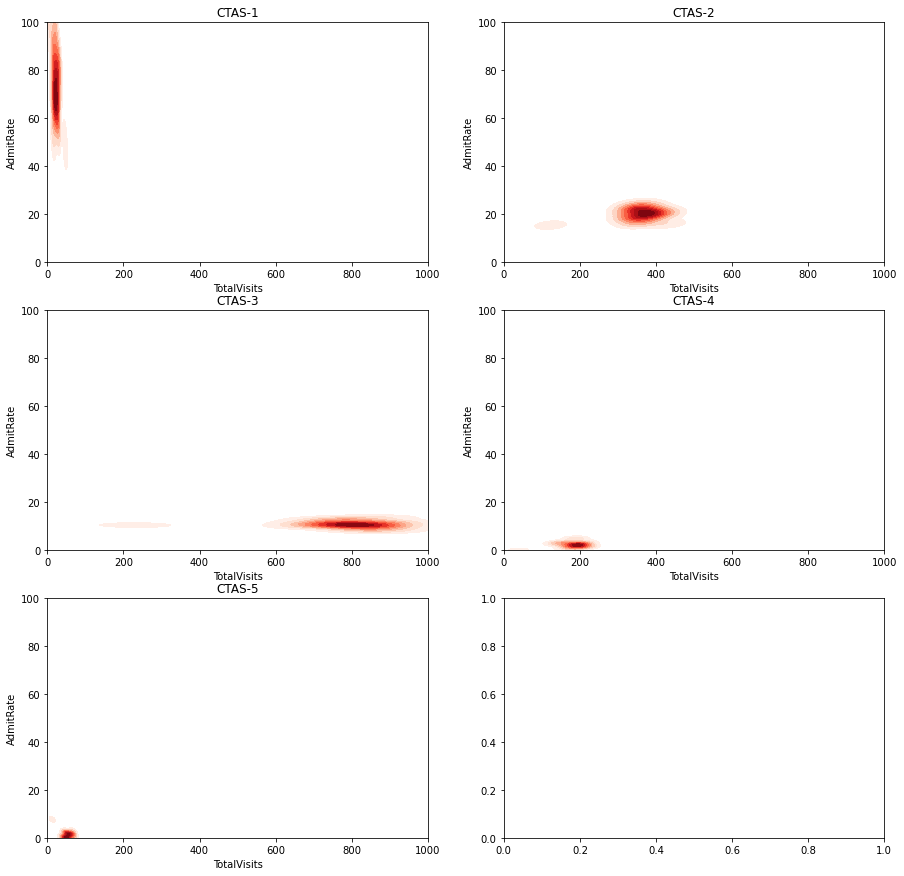

In [11]:
f, axes = plt.subplots(3,2, figsize = (15,15))

x= {'1':0,'2':0,'3':1,'4':1,'5':2}

for i in  range(1,len(mydata['TriageLevel'].unique())+1): 
    if i%2 == 0:
        y = 1
    else:
        y = 0
    k = sns.kdeplot(mydata[mydata.CTASIndex==i].TotalVisits, mydata[mydata.CTASIndex==i].AdmitRate, shade = True,shade_lowest = False, cmap = 'Reds', ax = axes[x[str(i)],y])
    k.set_xlim(0,1000)
    k.set_ylim(0,100)
    k.set_title('CTAS-'+str(i))


(0.0, 100.0)

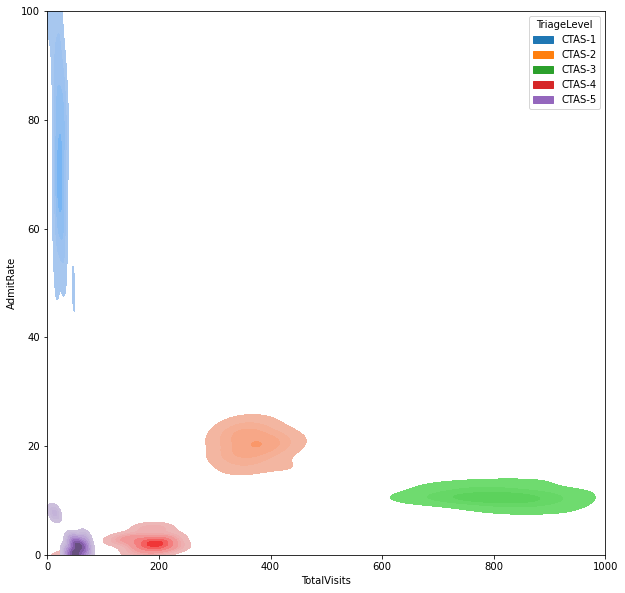

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
k = sns.kdeplot(x=mydata.TotalVisits, y=mydata.AdmitRate,shade = True,shade_lowest = False, hue = mydata.TriageLevel)
k.set_xlim(0,1000)
k.set_ylim(0,100)



In [54]:
newdata= pd.read_csv('Book2.csv')

newdata.head(10)

,Unnamed: 0,CTAS-4,CTAS-5,CTAS- 4&5,2016 Population,2021 Population,Intraprovincial migrants,Interprovincial migrants,External migrants,Total Migrants
0,CTAS-4,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CTAS-5,0.995344,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CTAS- 4&5,0.999739,0.997286,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,2016 Population,0.986162,0.988783,0.987613,1.000000,NaN,NaN,NaN,NaN,NaN
4,2021 Population,0.988672,0.986382,0.988962,0.998333,1.000000,NaN,NaN,NaN,NaN
5,Intraprovincial migrants,0.984625,0.973507,0.982820,0.963371,0.973681,1.000000,NaN,NaN,NaN
6,Interprovincial migrants,0.993970,0.989637,0.993781,0.989298,0.993998,0.992144,1.000000,NaN,NaN
7,External migrants,0.971296,0.955897,0.968465,0.949645,0.963510,0.997501,0.984417,1.000000,NaN
8,Total Migrants,0.981600,0.969374,0.979530,0.961368,0.972601,0.999758,0.991092,0.998727,1.0


In [70]:
newdata.index = newdata['Unnamed: 0']
newdata = newdata.drop('Unnamed: 0',1)
newdata.head()

,CTAS-4,CTAS-5,CTAS- 4&5,2016 Population,2021 Population,Intraprovincial migrants,Interprovincial migrants,External migrants,Total Migrants
Unnamed: 0,,,,,,,,,
CTAS-4,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTAS-5,0.995344,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTAS- 4&5,0.999739,0.997286,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2016 Population,0.986162,0.988783,0.987613,1.000000,NaN,NaN,NaN,NaN,NaN
2021 Population,0.988672,0.986382,0.988962,0.998333,1.0,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Unnamed: 0'>

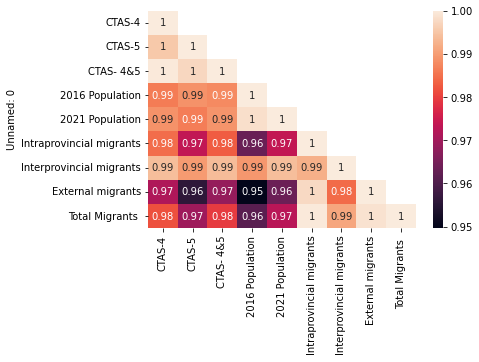

In [72]:
sns.heatmap(data=newdata, annot = True)

In [ ]:
Here is a repo for real-life geospatial analytics I recently completed. https://github.com/Toba-Joseph/Clinical-Visits.

It took me 3 weeks to complete this. the major take home is if you are not ready for in-dept research, then data science might not be for you. 

I thought I would scale through with only power BI, but I later realized I need a bivariate Kernel Density Estimation (KDE) plot and a heatmap to better tell my story. once again, I sought refuge from my new friend "Jupyter Notebook"       #datascience 

In [ ]:
Real-life geospatial analytics on clinical visits using Power BI and Python Programming